# hierarchically clustered correlations between country views on homosexuality and LGBTI and country happiness metrics

# references

- [The ILGA-RIWI 2016 Global Attitudes Survey on LGBTI People in Partnership with LOGO](http://ilga.org/downloads/07_THE_ILGA_RIWI_2016_GLOBAL_ATTITUDES_SURVEY_ON_LGBTI_PEOPLE.pdf)
- [The Global Divide on Homosexuality, Pew Research, 2014](http://www.pewglobal.org/files/2014/05/Pew-Global-Attitudes-Homosexuality-Report-REVISED-MAY-27-2014.pdf)
- [World Happiness Report 2017 Wikipedia table](https://en.wikipedia.org/wiki/World_Happiness_Report#2017_report)

# data

In [1]:
import pandas as pd

ELGARIWI2016 = pd.read_csv("ILGA-RIWI_2016.csv", delimiter = ",")
PGAHR2014    = pd.read_csv("Pew_Global_Attitudes_Homosexuality_Report_2014.csv", delimiter = ",")
WHR2017      = pd.read_csv("World_Happiness_Report_2017.csv", delimiter = ",")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context = "paper", font = "monospace")

In [3]:
ELGARIWI2016.head()

,country,agree being LGBTI should be a crime,disagree being LGBTI should be a crime
0,Algeria,43,35
1,Argentina,13,67
2,Australia,15,66
3,Bolivia,18,54
4,Brazil,11,68


In [4]:
PGAHR2014.head()

,country,homosexuality should be accepted by society,homosexuality should not be accepted by society
0,Argentina,74,21
1,Australia,79,18
2,Bolivia,43,49
3,Brazil,60,36
4,Britain,76,18


In [5]:
ELGARIWI2016_PGAHR2014 = pd.merge(ELGARIWI2016, PGAHR2014, on = "country", how = "outer")

In [6]:
ELGARIWI2016_PGAHR2014.corr()

,agree being LGBTI should be a crime,disagree being LGBTI should be a crime,homosexuality should be accepted by society,homosexuality should not be accepted by society
agree being LGBTI should be a crime,1.000000,-0.950706,-0.873782,0.917213
disagree being LGBTI should be a crime,-0.950706,1.000000,0.890505,-0.930326
homosexuality should be accepted by society,-0.873782,0.890505,1.000000,-0.989094
homosexuality should not be accepted by society,0.917213,-0.930326,-0.989094,1.000000


In [7]:
ELGARIWI2016_PGAHR2014.rename(columns = {"country": "Country"}, inplace = True)

ELGARIWI2016_PGAHR2014_WHR2017 = pd.merge(ELGARIWI2016_PGAHR2014, WHR2017, on = "Country", how = "outer")

# Exclude countries for which there is no ELGARIWI2016 and PGAHR2014 data.
ELGARIWI2016_PGAHR2014_WHR2017 = ELGARIWI2016_PGAHR2014_WHR2017[~(ELGARIWI2016_PGAHR2014_WHR2017["agree being LGBTI should be a crime"].isnull() & ELGARIWI2016_PGAHR2014_WHR2017["disagree being LGBTI should be a crime"].isnull() & ELGARIWI2016_PGAHR2014_WHR2017["homosexuality should be accepted by society"].isnull() & ELGARIWI2016_PGAHR2014_WHR2017["homosexuality should not be accepted by society"].isnull())]

ELGARIWI2016_PGAHR2014_WHR2017.head()

,Country,agree being LGBTI should be a crime,disagree being LGBTI should be a crime,homosexuality should be accepted by society,homosexuality should not be accepted by society,Overall Rank,Change in rank,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
0,Algeria,43.0,35.0,NaN,NaN,53.0,-15.0,5.872,-0.483,1.092,1.146,0.618,0.233,0.069,0.146,2.568
1,Argentina,13.0,67.0,74.0,21.0,24.0,2.0,6.599,-0.051,1.185,1.440,0.695,0.495,0.109,0.060,2.614
2,Australia,15.0,66.0,79.0,18.0,9.0,0.0,7.284,-0.029,1.484,1.510,0.844,0.602,0.478,0.301,2.065
3,Bolivia,18.0,54.0,43.0,49.0,58.0,1.0,5.823,0.001,0.834,1.228,0.474,0.559,0.226,0.060,2.443
4,Brazil,11.0,68.0,60.0,36.0,22.0,-5.0,6.635,-0.317,1.107,1.431,0.617,0.437,0.162,0.111,2.769


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


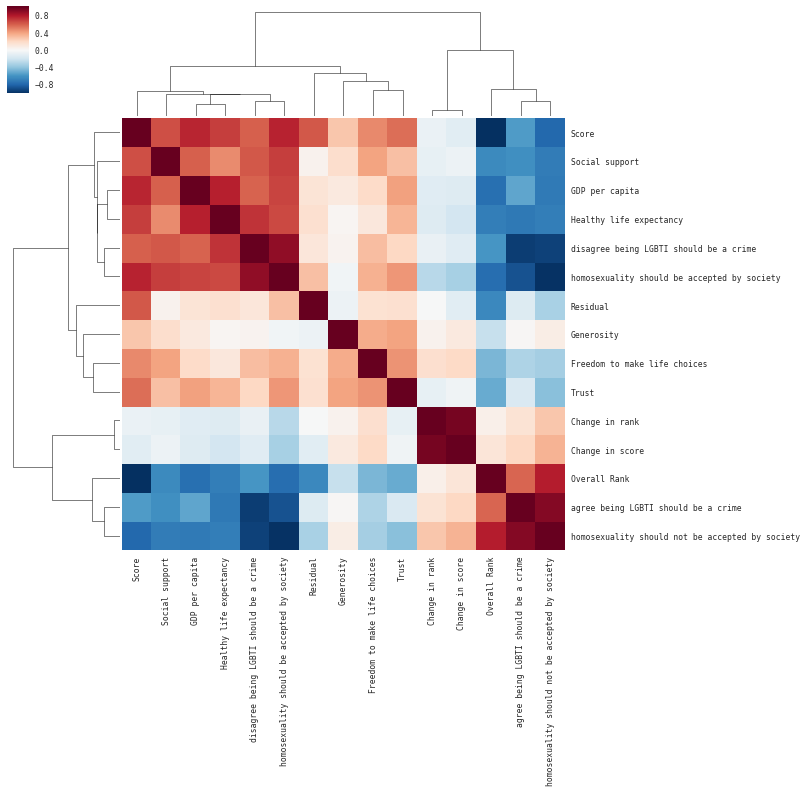

In [8]:
plot = sns.clustermap(ELGARIWI2016_PGAHR2014_WHR2017.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)